In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [81]:
predictions_df = pd.read_pickle('../data/predictions/baseline_classifier_USDJPY-5m-20210101-20241231-CUSUM_0.001-TB.pkl')

In [82]:
predictions_df.head()

,t1,trgt,ret,bin,bin_class,prob_0,prob_1,prob_2,prediction,pred_side,confidence
timestamp,,,,,,,,,,,
2021-01-07 09:10:00,2021-01-07 09:45:00,0.000432,0.000435,1.0,2.0,0.408761,0.170895,0.420343,2,1,0.420343
2021-01-07 09:50:00,2021-01-07 10:30:00,0.000422,0.000531,1.0,2.0,0.399466,0.182490,0.418044,2,1,0.418044
2021-01-07 10:35:00,2021-01-07 12:00:00,0.000411,0.000690,1.0,2.0,0.394150,0.189630,0.416220,2,1,0.416220
2021-01-07 12:00:00,2021-01-07 12:20:00,0.000446,-0.000603,-1.0,0.0,0.393251,0.190848,0.415901,2,1,0.415901
2021-01-07 12:35:00,2021-01-07 13:10:00,0.000422,-0.000540,-1.0,0.0,0.404476,0.176055,0.419468,2,1,0.419468


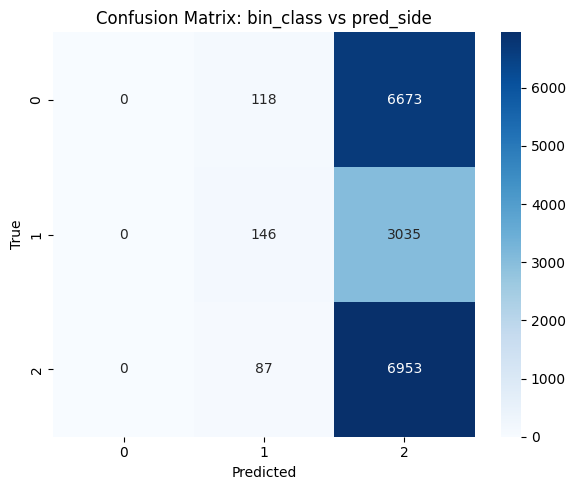

In [83]:
# 將類別轉為整數型別
y_true = predictions_df["bin_class"].astype(int)
y_pred = predictions_df["prediction"].astype(int)

# 計算混淆矩陣
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])


# 繪圖
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix: bin_class vs pred_side")
plt.tight_layout()
plt.show()


In [84]:
filter_df = predictions_df[predictions_df['confidence']>0.5]

In [85]:
filter_df['bin_class'].value_counts()

bin_class
1.0    26
2.0    20
0.0     8
Name: count, dtype: int64

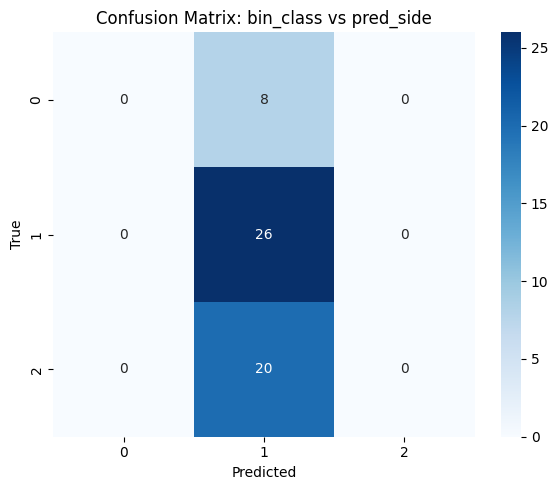

In [86]:
# 將類別轉為整數型別
y_true = filter_df["bin_class"].astype(int)
y_pred = filter_df["prediction"].astype(int)

# 計算混淆矩陣
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])


# 繪圖
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix: bin_class vs pred_side")
plt.tight_layout()
plt.show()
